# Bibliotheek

Installeer OpenCV:

    https://pypi.org/project/opencv-python/
    
Plotten van foto's: 

    https://matplotlib.org/stable/tutorials/introductory/images.html
    
Installeer scikit-image: 
    
    https://scikit-image.org/docs/stable/install.html
    
scikit-images voorbeelden:

    https://scikit-image.org/docs/stable/auto_examples/index.html

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import skimage
import cv2
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

# Video opname voorbeeld

Klik op `escape` om de opname te stoppen.

# Foto voorbeeld

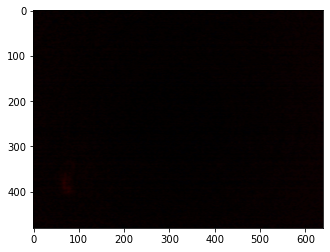

In [19]:
camera = cv2.VideoCapture(1) # Maak verbinding met int : camera id

retval, frame = camera.read() # lees de camera uit

plt.imshow(frame) # geef het uitgelezen frame weer

camera.release() # verbreek de verbinding met de camera

# Camera instellingen

# Voorbeeld beeld analyse

RGB -> Grayscale: 

https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-gray-py

Matplotlib colormaps:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

## RGB -> Zwart wit
We hebben slechts interesse in de (relatieve) intensiteit van pixels. Wegens deze reden zetten we het beeld van kleur om naar zwart wit.

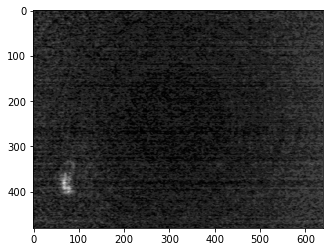

In [20]:
grayscale = skimage.color.rgb2gray(frame) # RGB -> grayscale

plt.imshow(grayscale, cmap=plt.cm.gray) # De colormap (cmap) is puur ter visuele weergave

In [21]:
print("RGB ndarray shape: ", frame.shape) # 3 kanaals
print("Grayscale ndarray shape: ", grayscale.shape) # 1 kanaals

RGB ndarray shape:  (480, 640, 3)
Grayscale ndarray shape:  (480, 640)


## Intensiteit per pixel kolom
We kunnen alle waarden van één kolom sommeren om de z.g. intensiteit van de betreffende kolom te bepalen. Deze intensiteit heeft (nog) geen eenheid, daarom noemen we dit `arbitrary units` (a.u.). 

Wanneer het lichtspectrum over de CMOS verspreid is zou je onderstaande code kunnen gebruiken om (bijna) direct een spectrogram te krijgen. Het pixel nummer is namenlijk te koppelen aan spatiële informatie en daarmee aan de frequentie van het licht.

Text(0, 0.5, 'intensity [a.u.]')

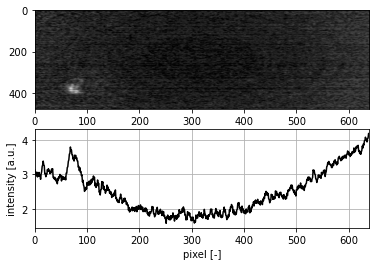

In [22]:
I = grayscale.sum(axis=0) # row wise summation


plt.subplot(2,1,1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim() # grab min max values from imshow

plt.subplot(2,1,2)
plt.plot(I, c='black')

plt.xlim(xmin,xmax) # set min max values

plt.grid()
plt.xlabel(r"pixel [-]")
plt.ylabel(r"intensity [a.u.]")

# Intensiteit per frame
Het zal voorkomen dat we geinteresseerd zijn in de relatieve intensiteit van het algehele camera beeld. Dit is op verschillende manieren te bepalen. Men kan de pixel intensiteit van het gehele frame bij elkaar optellen. Daar zou je nog de achtergrond ruis (`shot noise`) vanaf kunnen halen. Echter, als dat overal aanwezig is dan is dit voor het simpelste doeleinde van het spectroscoop practicum niet relevant. We bekijken toch slechts relatieve informatie.

## Intensiteit van één frame

In [23]:
I_frame = grayscale.sum() # sommatie van één frame
I_frame

1610.0277611764704

## Video opname

In [85]:
cam = cv2.VideoCapture(1)

video = []

i=0
while i<1000: # Maak een opname van 100 frames
    i+=1
    check, frame = cam.read()
    video.append(frame) # Python arrays zijn langzaam, maar dit is in ieder geval duidelijk

video = np.array(video)
video = skimage.color.rgb2gray(video) # RGB -> grayscale


cam.release()
cv2.destroyAllWindows()

## Bekijk de opname

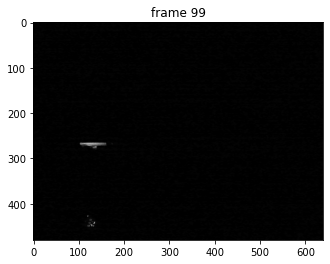

In [49]:
from IPython import display

fig = plt.figure()

imgs = []
for i,frame in enumerate(video):
    display.clear_output(wait=True)
    plt.title(r"frame %s" % i)
    plt.imshow(frame, cmap=plt.cm.gray)
    plt.show()

# Totale intensiteit per frame

In [67]:
arr = np.array(intensities)


TypeError: _save_dispatcher() missing 1 required positional argument: 'arr'

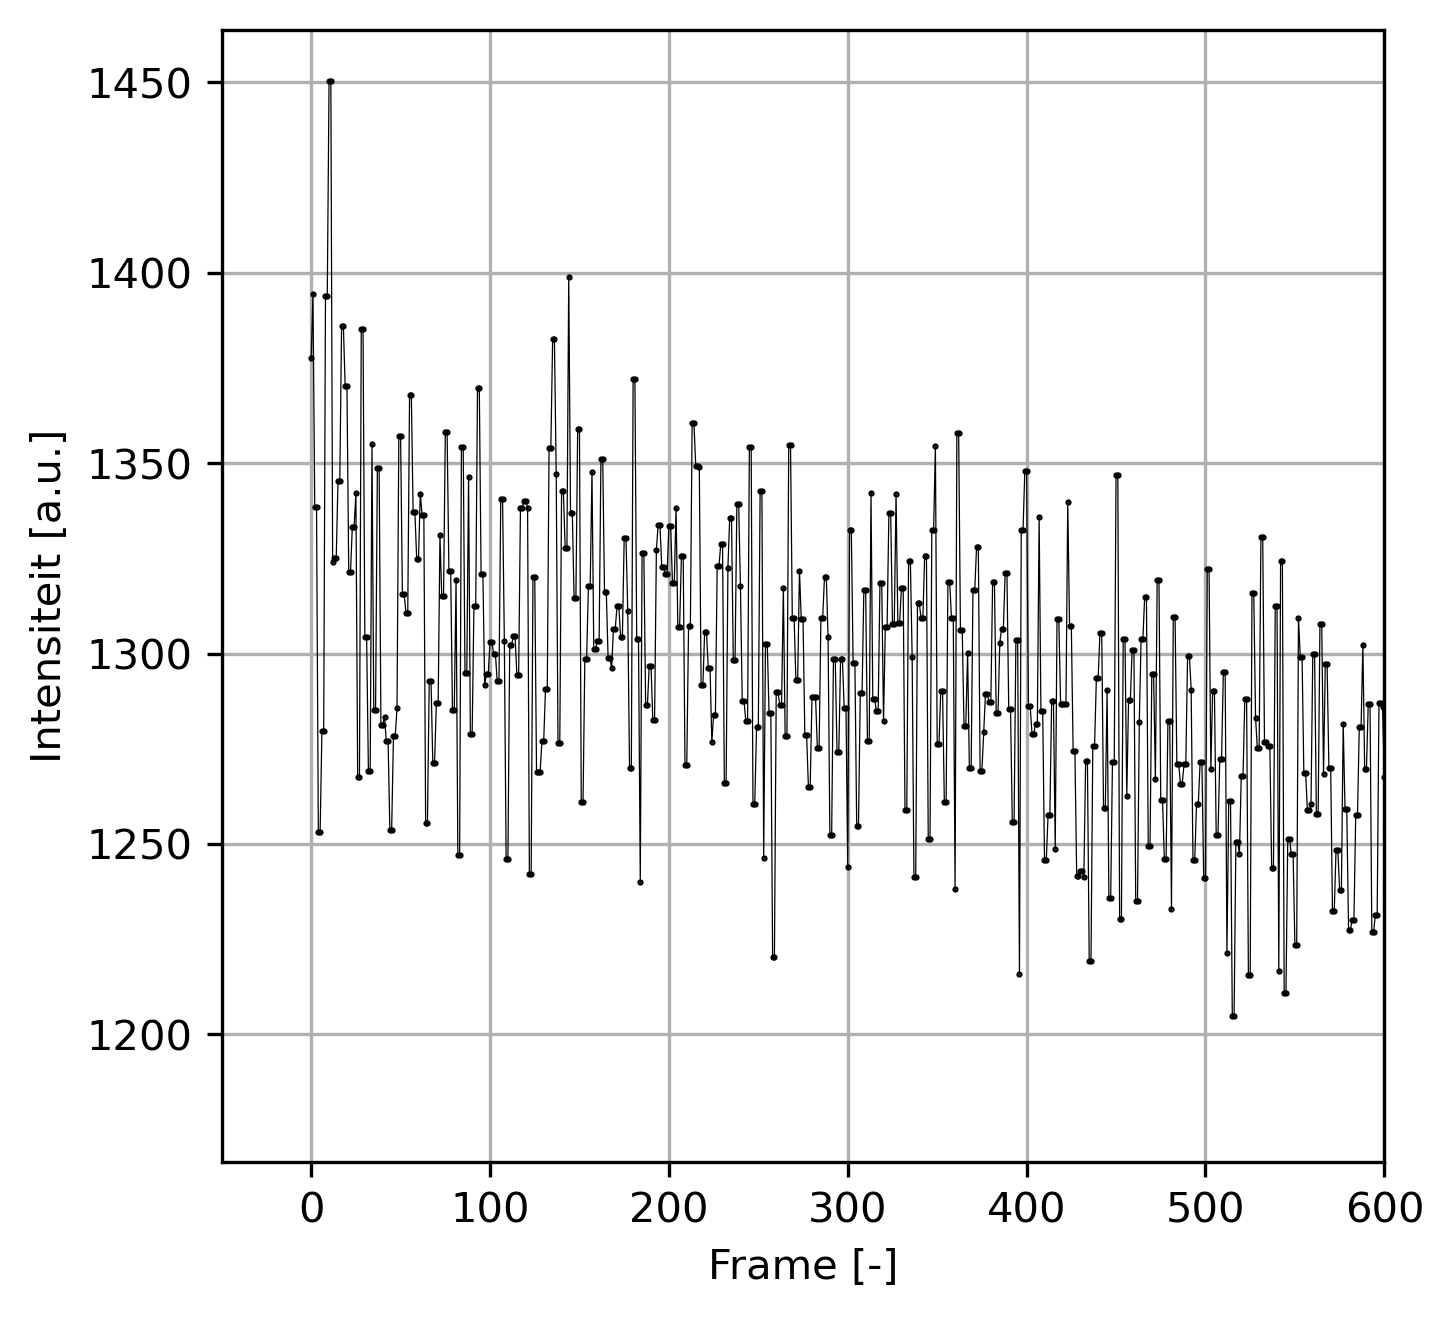

In [86]:
intensities = []
for frame in video:
    intensities.append(frame.sum())
 
plt.figure(figsize=(5,5), dpi=300)
plt.plot(intensities, '.-', color='black', lw=0.3, ms=1)
plt.xlabel(r"Frame [-]")
plt.ylabel(r"Intensiteit [a.u.]")
#plt.ylim([None,3000])
plt.xlim([None,600])
#plt.yscale('log')
plt.grid()

# Bepalen sensor responsitiveit
Door twee polarisatie filters te gebruiken (Malus's law) zouden we de responsiviteit van de camera in kaart kunnen brengen. Zo kunnen we gelijk inzicht kijken in de karaktistiek van de sensor. Mogelijk is hierdoor relatieve intensiteit zinvoller te gebruiken. Heeft de sensor hysterese? 
